In [1]:
%matplotlib inline
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web

In [2]:
style.use("ggplot")

Let's specify the time window we are interested in:

In [3]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

In [4]:
df = web.DataReader('TSLA', 'yahoo', start, end)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


### Part 2

One can store the data to a csv file for a later use.

In [1]:
df.to_csv('data/tsla.csv')

NameError: name 'df' is not defined

This file can be read from disk to a pandas dataframe:

In [6]:
df = pd.read_csv('data/tsla.csv', parse_dates=True, index_col=0)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


The extra parameter are necessary to parse correctly the dates as the index of the dataframe. 
One can plot the dataframe with a simple command:

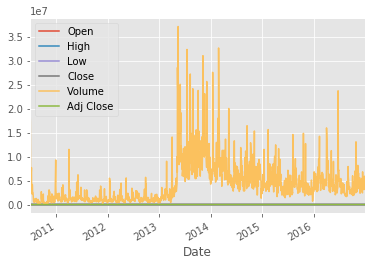

In [7]:
df.plot()
# plt.show()

To plot specific columns:

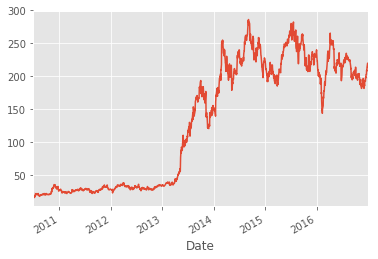

In [8]:
df['Adj Close'].plot()
# plt.show()

### Part 3

We can create new columns using existing data:

In [9]:
# Let's create a 100-moving-average-window data column
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
# df.dropna(inplace=True) # Without min_periods, the first 100 rows will be NaN for obvious reasons
df.head()

,Open,High,Low,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000,23.860000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001,22.220000
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001,20.998000


To be able to make more involved plots, we'll have to unleash the power of matplotlib!

<Container object of 1640 artists>

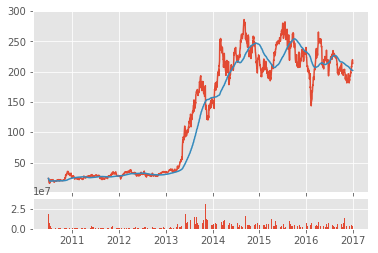

In [10]:
# 6 rows, 1 column, starts at (0,0)
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1) 
# 6 rows, 1 column, starts at (5,0), shares x-axis with ax1
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1) 

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
# plt.close()

### Part 4
Let's resample and create candlestick plots!
Why resample? Maybe you are interested in a different rate (e.g hourly) than what your data provide natively (e.g. every minute), or maybe your data is a time-series that has an irregular rate, and you would like to resample it to a steady one.

In [11]:
# We want open-high-low-close data every 10 days
df_ohlc = df['Adj Close'].resample('10D').ohlc()
# Then we want the volume. Sum() conserves the same total volume
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.head()

,open,high,low,close
Date,,,,
2010-06-29,23.889999,23.889999,15.800000,17.459999
2010-07-09,17.400000,20.639999,17.049999,20.639999
2010-07-19,21.910000,21.910000,20.219999,20.719999
2010-07-29,20.350000,21.950001,19.590000,19.590000
2010-08-08,19.600000,19.600000,17.600000,19.150000


To use matplotlib's candlestick plots we need to have the date as a normal column.

In [12]:
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
df_ohlc.head()

,Date,open,high,low,close
0,733952.0,23.889999,23.889999,15.800000,17.459999
1,733962.0,17.400000,20.639999,17.049999,20.639999
2,733972.0,21.910000,21.910000,20.219999,20.719999
3,733982.0,20.350000,21.950001,19.590000,19.590000
4,733992.0,19.600000,19.600000,17.600000,19.150000


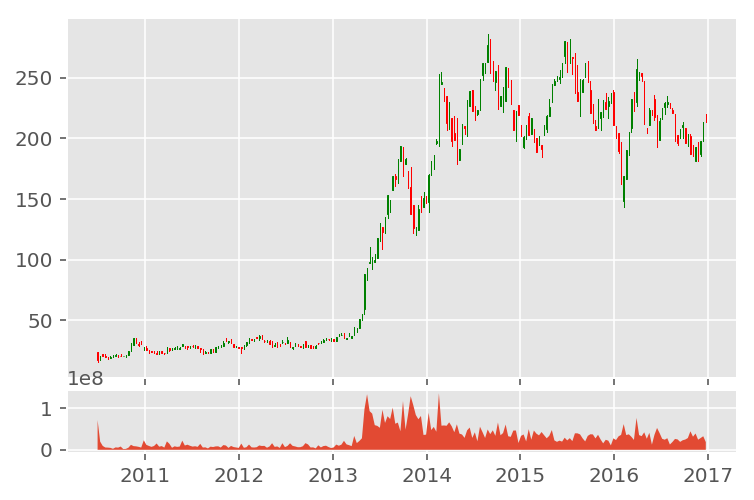

In [13]:
%config InlineBackend.figure_format='retina'
# 6 rows, 1 column, starts at (0,0)
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1) 
# 6 rows, 1 column, starts at (5,0), shares x-axis with ax1
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1) 

ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g', colordown='r')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
# plt.show()

### Part 5

Now we'll get the whole list of S&P500 companies tickers, by scraping the wikipedia website (see next notebook).